In [1]:
import pandas as pd
#import numpy as np
import re 
import matplotlib.pyplot as plt
#import SRC.function as f

In [2]:
shark_df = pd.read_csv("INPUT/GSAF5.csv", engine="python")
shark_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [3]:
#Check number of columns and samples from the dataset 
shape = shark_df.shape
print(f"Number of columns:{shape[1]}\nList of columns:{shark_df.columns}\nNumber of samples:{shape[0]}")

Number of columns:24
List of columns:Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')
Number of samples:5992


In [4]:
#Check null values
nullvalues = shark_df.isnull().sum()
print(nullvalues)
#Select columns with a significant number of nullvalues (90%), which can be discarded. 
columns_to_eliminate = [col for col in shark_df.columns if shark_df[col].isnull().sum() >= (0.9*shape[0])]
print(F"{columns_to_eliminate} can be removed from the dataset")

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64
['Unnamed: 22', 'Unnamed: 23'] can be removed from the dataset


In [5]:
#Data provided by the columns to be removed, to check that this information is not relevant. 
display(shark_df[(shark_df["Unnamed: 22"].isnull()==False)|(shark_df["Unnamed: 23"].isnull()==False)])
#Remove columns 
shark_df = shark_df.drop(columns_to_eliminate, axis=1)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1247,2006.06.18,18-Jun-06,2006,Unprovoked,BRAZIL,Pernambuco,"Punta Del Chifre Beach, Olinda",Body boarding,Humberto Pessoa Batista,M,...,NaN,globalsurfnews.com,2006.06.18-Batista.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.06.18,2006.06.18,4746,stopped here,NaN
4182,1952.07.13,13-Jul-52,1952,Provoked,USA,California,"San Diego, San Diego County",Fishing,"Gerald Howard, on board sportsfishing boat Ter...",M,...,NaN,"L.A. Times, 7/14/1952",1952.07.13-Howard.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.07.13,1952.07.13,1811,NaN,Teramo
5585,1879.03.10,10-Mar-1879,1879,Invalid,AUSTRALIA,New South Wales,Near Sydney,The steamship Bonnie Dundee lost in collision,Cabin boy of the Bonnie Dundee,M,...,NaN,"Star, 3/22/1879",1879.03.10-Bonnie-Dundee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1879.03.10,1879.03.10,408,NaN,change filename


In [6]:
#Check duplicate columns. Similarities between href and href formula, as well as, Case Number, Case Number.1 and Case Number.2
def check_duplicates(a,b,threshold):
    if sum(a==b)>= threshold:
        return True
thr = 0.9*shape[0]
columns_duplicates = [("href","href formula"),("Case Number","Case Number.1"),("Case Number","Case Number.2")]
for col in columns_duplicates:
    if check_duplicates(shark_df[col[0]],shark_df[col[1]],thr)== True:
        shark_df = shark_df.drop(col[1], axis=1)
shark_df = shark_df.drop("original order", axis=1)
shark_df.head()
#No duplicates in this dataset
shark_df.drop_duplicates().shape

(5992, 18)

,Type,Total
0,Boat,310
1,Provoked,557
2,Sea Disaster,220
3,Unknown,519
4,Unprovoked,4386


The percentage of unprovoked attacks:73.2


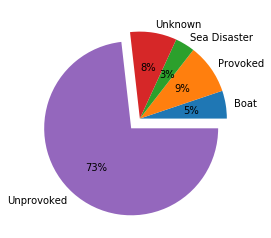

In [7]:
########## TYPE ############
options = set(shark_df["Type"])
shark_df.Type = shark_df.Type.str.replace(r"Boat(.*)?","Boat")
shark_df.Type = shark_df.Type.str.replace(r"Invalid(.*)?","Unknown")
shark_df_type = shark_df.groupby("Type").agg({"Type":"count"})
shark_df_type =shark_df_type.rename(columns={"Type":"Total"})
d = dict(shark_df_type.Total)
shark_df_type = shark_df_type.reset_index()
display(shark_df_type)
p = round((d["Unprovoked"]/sum(d.values()))*100,2)
print(f"The percentage of unprovoked attacks:{p}")
plt.pie(shark_df_type['Total'], labels=shark_df_type['Type'],explode=(0, 0, 0, 0, 0.15), autopct='%1d%%')
plt.show()

The Country, where more shark attacks were registered, is USA with 2116 attacks


'shark_df_USA = shark_df[(shark_df["Country"]== "USA")]\nshark_df_USA =shark_df_USA[["Case Number","Country","Area"]]\nshark_df_USA.groupby("Area").agg({"Area":"count"})'

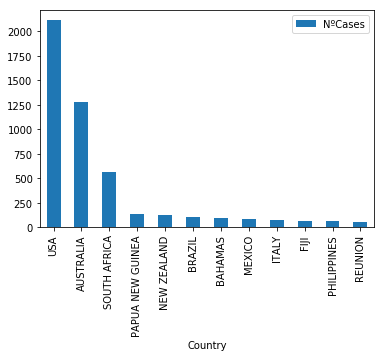

In [8]:
################## COUNTRY #################
shark_df.Country=shark_df.Country.fillna("UNKNOWN")
shark_df.Country=shark_df['Country'].apply(lambda x: x.upper())
shark_df.Country = shark_df.Country.str.replace(r"AA","A")
shark_df.Country = shark_df.Country.str.replace(r"(.+)\?","UNKNOWN")
shark_df.Country = shark_df.Country.str.replace(r"(.*)\s+/+\s(.*)","UNKNOWN")
shark_df_Country= pd.DataFrame(shark_df.Country.value_counts()).reset_index().rename(columns={"index":"Country","Country":"NºCases"})
shark_df_Country = shark_df_Country[(shark_df_Country["NºCases"] > 55)]
shark_df_Country.plot.bar(x="Country")
print(f"The Country, where more shark attacks were registered, is {shark_df_Country.Country[0]} with {shark_df_Country['NºCases'].max()} attacks")


## Estudiar dentro de USA la zona con mayor probabilidad de ataque
'''shark_df_USA = shark_df[(shark_df["Country"]== "USA")]
shark_df_USA =shark_df_USA[["Case Number","Country","Area"]]
shark_df_USA.groupby("Area").agg({"Area":"count"})'''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


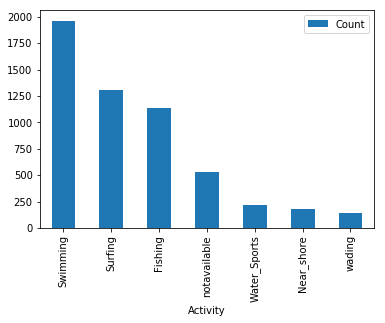

In [9]:
################## ACTIVITY ######################
shark_df.Activity=shark_df.Activity.fillna("NotAvailable")
shark_df.Activity=shark_df['Activity'].apply(lambda x: x.lower())
def SearchActivity(sequence,pattern):
    match = re.search(r"(.*)?"+pattern[0]+"(.*)?",sequence)
    if match:
        return pattern[1]
Swimming = ("swim|div|snork|bath|float","Swimming")
Fishing = ("fish|collec|lobster|sail","Fishing")
Water_Sports = ("boat|kayak|row|padd|cano","Water_Sports")
Surfing = ("surf|kite|board","Surfing")
Near_shore = ("play|walk|climb|beach|jump|stand|film","Near_shore")
activities = [Swimming,Fishing,Water_Sports,Surfing,Near_shore]
act = []
for a in activities:
    act = shark_df['Activity'].apply(SearchActivity,pattern=a)
    for i in range(shark_df.shape[0]):
        if act[i]!=None:
            shark_df['Activity'][i]=act[i]
shark_df['Activity']
shark_df_activity = shark_df.groupby("Activity").agg({"Activity":"count"})
shark_df_activity =shark_df_activity.rename(columns={"Activity":"Count"})
shark_df_activity =shark_df_activity.sort_values("Count",ascending= False).reset_index()
shark_df_activity= shark_df_activity[(shark_df_activity.Count>100)]
shark_df_activity.plot.bar(x="Activity")

There are 126 unknown case


,Year
decada,
1960,565
1970,326
1980,438
1990,627
2000,1024
2010,733


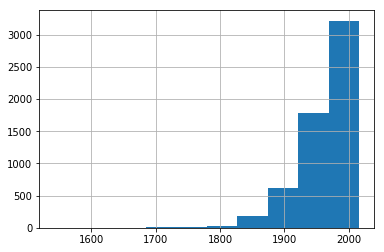

In [10]:
################### CASE NUMBER /DATE/ YEAR ########################
shark_df.sort_values("Year")
case_info = {}
case_info['Case'] = []
case_info['Year'] = []
case_info['Date']= []
index = 0
remove = []
for case in shark_df["Case Number"].values:
    res = re.findall(r"\d{4}\.\d{2}\.\d{2}[\.\w]*", case)
    res2 = re.findall(r"\d{4}", case)
    res3 = re.findall(r"\d{4}\.\d{2}\.\d{2}", case)
    if res:
        res3 = re.sub('\.','/',res3[0])
        case_info['Case'].append(res[0])
        case_info['Year'].append(int(res2[0]))
        case_info['Date'].append(res3)
    else:
        remove.append(index)
    index += 1
c_df = pd.DataFrame(case_info)
print(f"There are {shark_df.shape[0] - c_df.shape[0]} unknown case")
c_df.sort_values("Year", ascending= True)
c_df = c_df.drop([5863, 5864, 5865],axis=0)
c_df.Year.hist()
c_df["decada"] = pd.cut(c_df.Year.where(c_df['Year']>1950),bins=[1960,1970,1980,1990,2000,2010,2020], labels=range(1960,2020,10))
c_df.groupby("decada").agg({"Year":"count"})

In [14]:
shark_df = shark_df.drop(remove,axis=0)
shark_df = shark_df.drop([5863, 5864, 5865],axis=0)
shark_df[['Date','Year']]= c_df[['Date','Year']]
shark_df = shark_df.drop('Case Number',axis=1)

KeyError: "['Case Number'] not found in axis"

In [15]:
c_df.head()

,Case,Year,Date,decada
0,2016.09.18.c,2016,2016/09/18,2010
1,2016.09.18.b,2016,2016/09/18,2010
2,2016.09.18.a,2016,2016/09/18,2010
3,2016.09.17,2016,2016/09/17,2010
4,2016.09.15,2016,2016/09/15,2010


In [16]:
shark_df 

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href
0,2016/09/18,2016.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2016/09/18,2016.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2016/09/18,2016.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2016/09/17,2016.0,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2016/09/15,2016.0,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
5,2016/09/15,2016.0,Boat,AUSTRALIA,Western Australia,Bunbury,Fishing,Occupant: Ben Stratton,NaN,NaN,Shark rammed boat. No injury to occupant,N,NaN,NaN,"West Australian, 9/15/2016",2016.09.15.R-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
6,2016/09/11,2016.0,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",wading,male,M,60s,Minor injury to arm,N,15h15,3' to 4' shark,"News4Jax, 9/11/2016",2016.09.11-PonteVedra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
7,2016/09/07,2016.0,Unprovoked,USA,Hawaii,"Makaha, Oahu",Swimming,female,F,51,Severe lacerations to shoulder & forearm,N,14h30,"Tiger shark, 10?","Hawaii News Now, 9/7/2016",2016.09.07-Oahu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
8,2016/09/06,2016.0,Unprovoked,NEW CALEDONIA,North Province,Koumac,Surfing,David Jewell,M,50,FATAL,Y,15h40,NaN,"TVANouvelles, 9/6/2016",2016.09.06-Jewell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
9,2016/09/05,2016.0,Unprovoked,USA,South Carolina,"Kingston Plantation, Myrtle Beach, Horry County",Surfing,Rylie Williams,F,12,Lacerations & punctures to lower right leg,N,Late afternoon,NaN,"C. Creswell, GSAF",2016.09.05.b-Williams.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
